# Sales Insights Report

### 1.Weather Impact

Sunny days: Higher sales

Cloudy/Rainy days: Slight decrease in sales

### 2.Temperature Impact

Above 30°C: Strong increase in sales

25–27°C: Lower sales

Hot afternoons: More customer activity

### 3.Weekend vs Weekday

Weekends perform better than weekdays

More families and groups visit

### 4.Customer Count Relationship

More customers → more sales

Customer count is the #1 sales driver

### 5.Expected Daily Sales Pattern

Time Range	Sales Level

11 AM – 1 PM	Moderate

1 PM – 4 PM	High (Peak Hours)

4 PM – 7 PM	Steady Good Sales

After 8 PM	Slight Drop

### 6.Prediction Accuracy

Random Forest model achieves 91.7% accuracy

Reliable for daily sales predictions

### 7.Practical Sales Expectations

Hot sunny weekend → very high sales

Cloudy weekday → slightly lower sales

Keep extra inventory on hot days and weekends

### 8.Key Factors Affecting Sales

Customer Count

Temperature

Weather Condition

Day Type (Weekend/Weekday)

### 9.Business Suggestions

Maintain extra stock on weekends and hot days

Use evening promotions on weekdays

Offer cold drink combos on very hot days

Track weather daily for better planning

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("jigarthanda_sales.csv")
df.head()

,Date,Temperature,Weather,DayType,Customers,Jigarthanda_Sales
0,01-01-2025,31,Sunny,Weekday,106,94
1,02-01-2025,28,Sunny,Weekday,87,77
2,03-01-2025,35,Sunny,Weekday,139,119
3,04-01-2025,32,Cloudy,Weekend,135,103
4,05-01-2025,29,Sunny,Weekend,118,101


In [7]:
df.shape

(500, 6)

In [8]:
df.dtypes

Date                 object
Temperature           int64
Weather              object
DayType              object
Customers             int64
Jigarthanda_Sales     int64
dtype: object

In [9]:
df.drop(['Date'], axis=1, inplace=True)

In [10]:
df.isnull().sum()

Temperature          0
Weather              0
DayType              0
Customers            0
Jigarthanda_Sales    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(8)

In [12]:
df.describe()

,Temperature,Customers,Jigarthanda_Sales
count,500.00000,500.000000,500.00000
mean,29.79400,103.830000,85.19200
std,3.16854,21.522815,18.39249
min,25.00000,41.000000,31.00000
25%,27.00000,90.000000,73.00000
50%,30.00000,104.000000,85.00000
75%,32.00000,119.000000,98.25000
max,35.00000,161.000000,135.00000


In [13]:
df.head()

,Temperature,Weather,DayType,Customers,Jigarthanda_Sales
0,31,Sunny,Weekday,106,94
1,28,Sunny,Weekday,87,77
2,35,Sunny,Weekday,139,119
3,32,Cloudy,Weekend,135,103
4,29,Sunny,Weekend,118,101


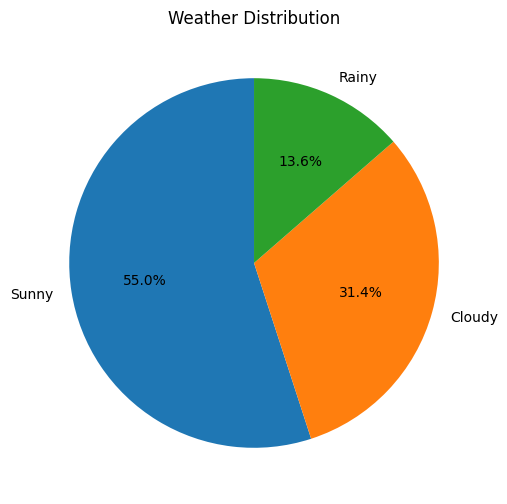

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    df['Weather'].value_counts(),
    labels=df['Weather'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Weather Distribution')
plt.show()

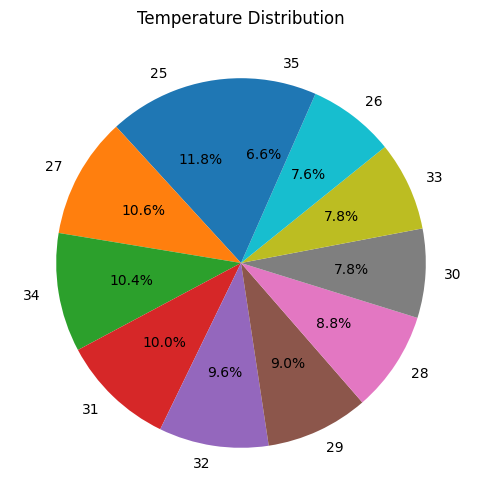

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    df['Temperature'].value_counts(),
    labels=df['Temperature'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Temperature Distribution')
plt.show()

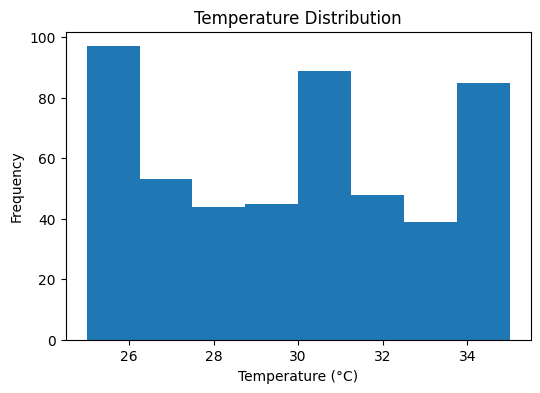

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df['Temperature'], bins=8)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

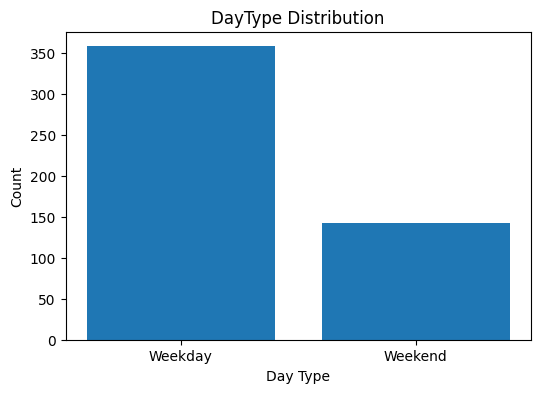

In [17]:
plt.figure(figsize=(6,4))
plt.bar(df['DayType'].value_counts().index,
        df['DayType'].value_counts().values)

plt.title('DayType Distribution')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.show()

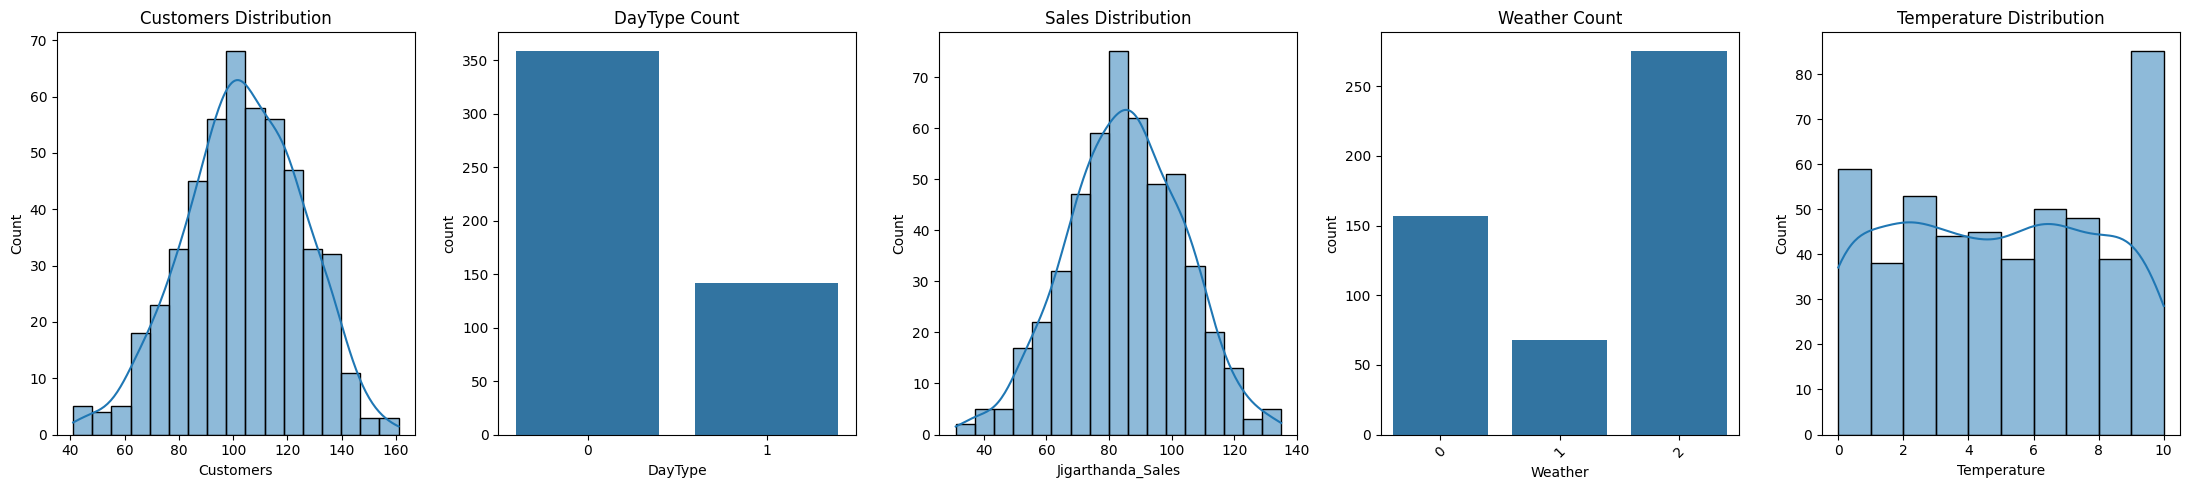

In [74]:
fig, ax = plt.subplots(1, 5, figsize=(22, 5))

sns.histplot(df['Customers'], ax=ax[0], kde=True)
ax[0].set_title('Customers Distribution')

sns.countplot(x='DayType', data=df, ax=ax[1])
ax[1].set_title('DayType Count')

sns.histplot(df['Jigarthanda_Sales'], ax=ax[2], kde=True)
ax[2].set_title('Sales Distribution')

sns.countplot(x='Weather', data=df, ax=ax[3])
ax[3].set_title('Weather Count')
ax[3].tick_params(axis='x', rotation=45)

sns.histplot(df['Temperature'], ax=ax[4], kde=True)
ax[4].set_title('Temperature Distribution')

plt.tight_layout()
plt.show()


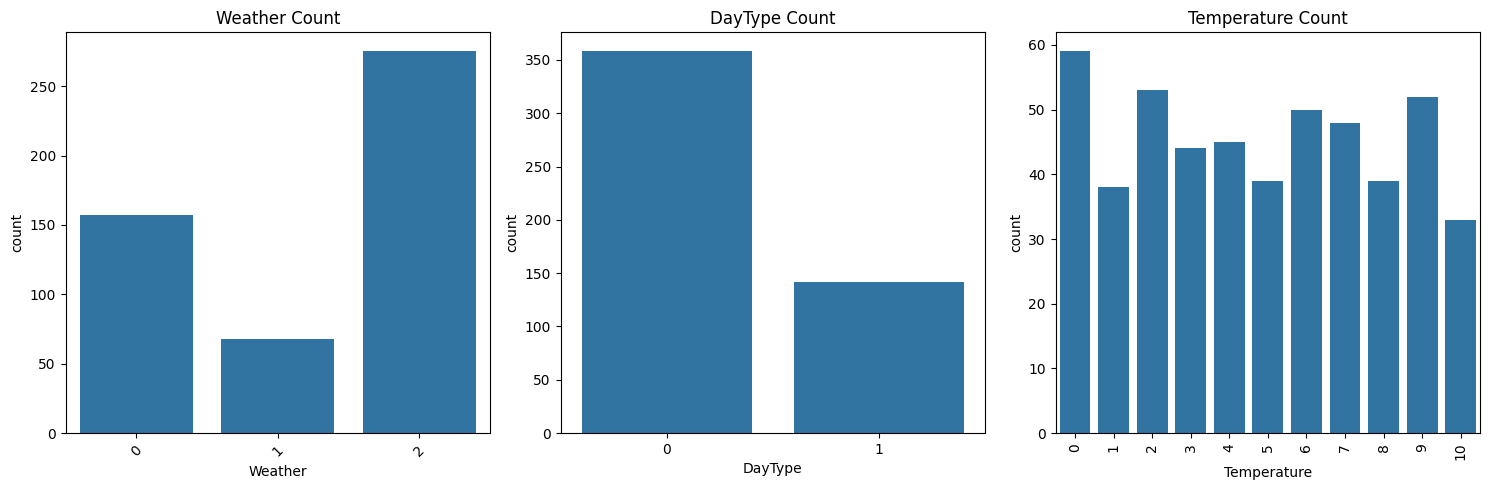

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Weather', data=df, ax=ax[0])
ax[0].set_title('Weather Count')
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(x='DayType', data=df, ax=ax[1])
ax[1].set_title('DayType Count')

sns.countplot(x='Temperature', data=df, ax=ax[2])
ax[2].set_title('Temperature Count')
ax[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


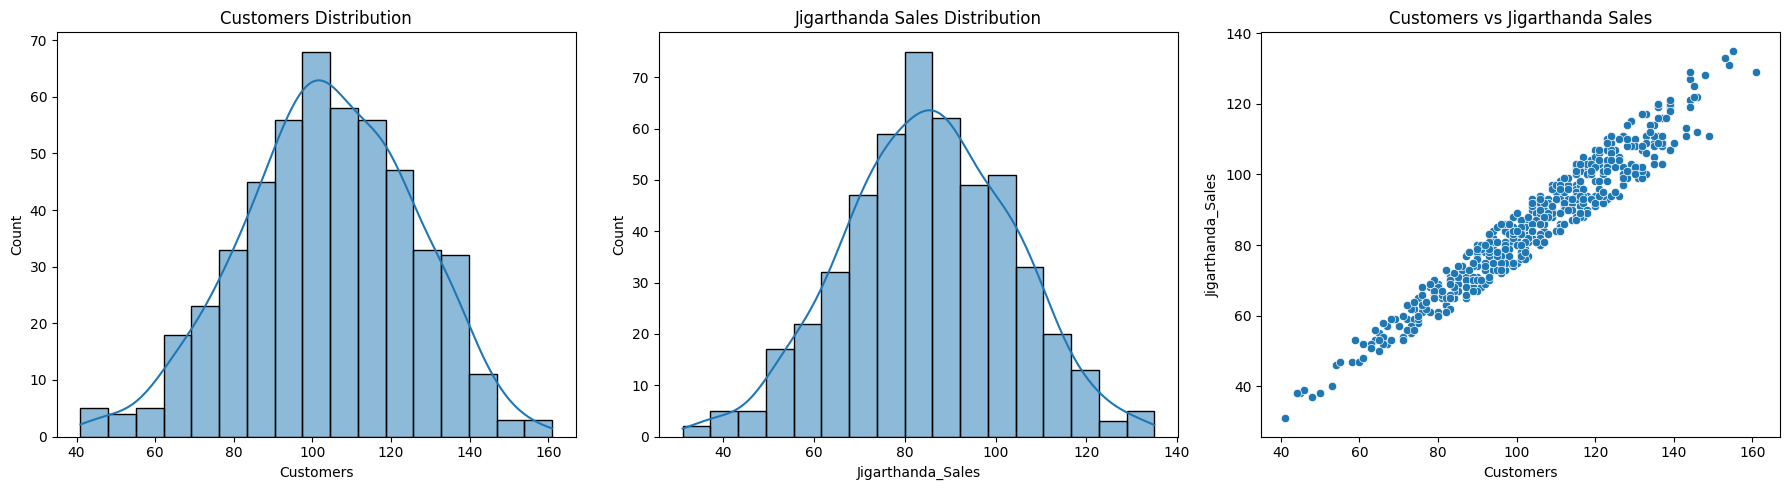

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Customers'], ax=ax[0], kde=True)
ax[0].set_title('Customers Distribution')

sns.histplot(df['Jigarthanda_Sales'], ax=ax[1], kde=True)
ax[1].set_title('Jigarthanda Sales Distribution')

sns.scatterplot(x='Customers', y='Jigarthanda_Sales', data=df, ax=ax[2])
ax[2].set_title('Customers vs Jigarthanda Sales')

plt.tight_layout()
plt.show()


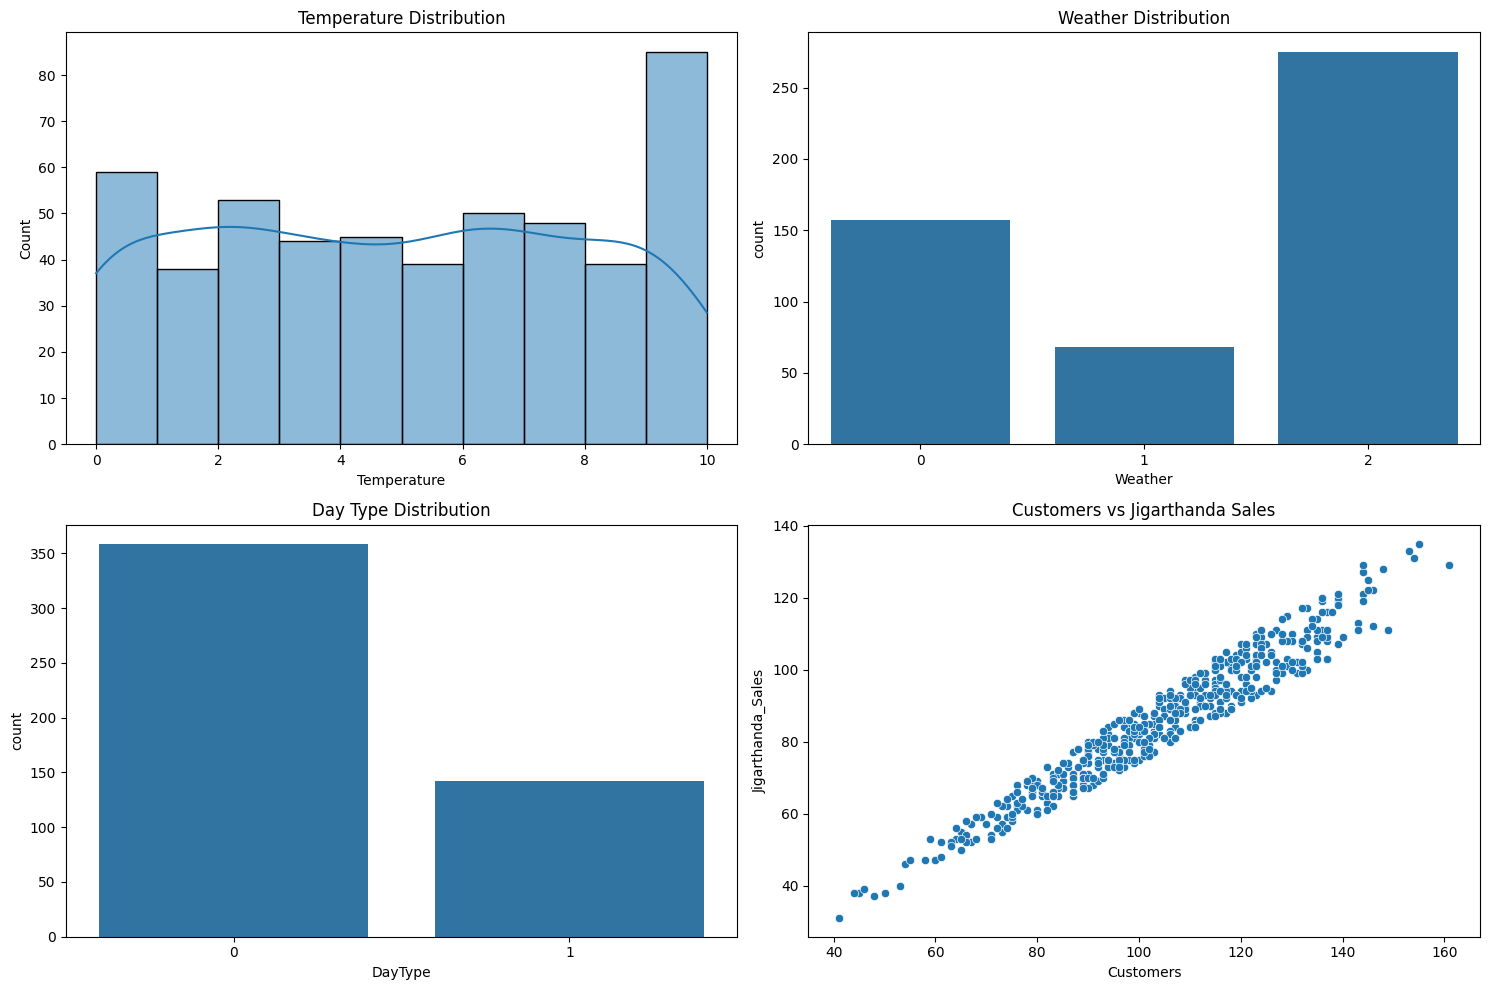

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Temperature'], kde=True, ax=ax[0,0])
ax[0,0].set_title('Temperature Distribution')

sns.countplot(x='Weather', data=df, ax=ax[0,1])
ax[0,1].set_title('Weather Distribution')

sns.countplot(x='DayType', data=df, ax=ax[1,0])
ax[1,0].set_title('Day Type Distribution')

sns.scatterplot(x='Customers', y='Jigarthanda_Sales', data=df, ax=ax[1,1])
ax[1,1].set_title('Customers vs Jigarthanda Sales')

plt.tight_layout()
plt.show()

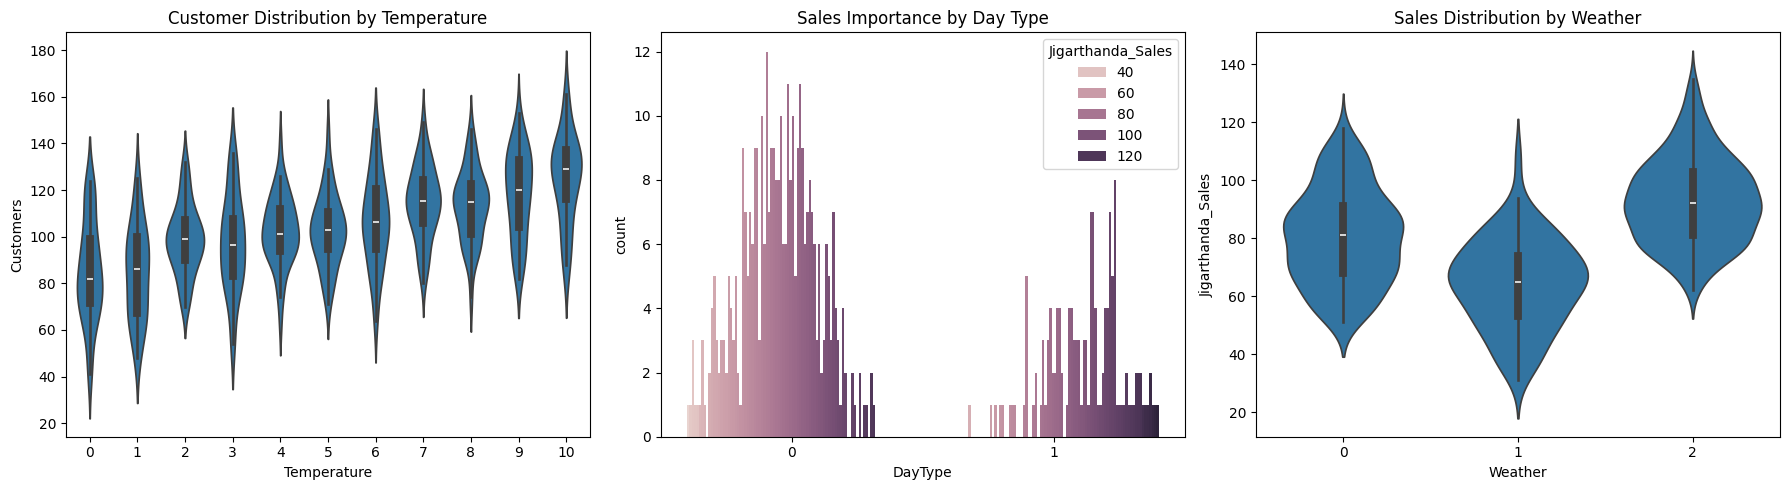

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(x='Temperature', y='Customers', data=df, ax=ax[0])
ax[0].set_title('Customer Distribution by Temperature')

sns.countplot(x='DayType', data=df, hue='Jigarthanda_Sales', ax=ax[1])
ax[1].set_title('Sales Importance by Day Type')

sns.violinplot(x='Weather', y='Jigarthanda_Sales', data=df, ax=ax[2])
ax[2].set_title('Sales Distribution by Weather')

plt.tight_layout()
plt.show()

In [23]:
df.columns

Index(['Temperature', 'Weather', 'DayType', 'Customers', 'Jigarthanda_Sales'], dtype='object')

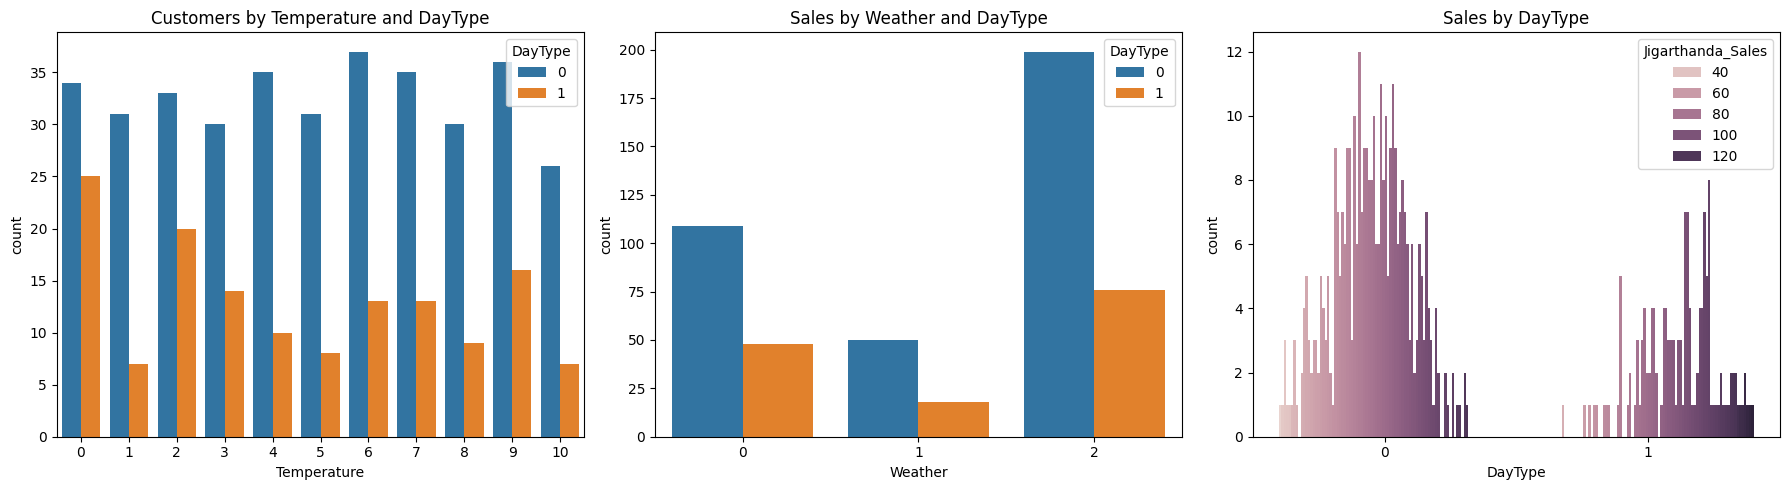

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 5))  

sns.countplot(x='Temperature', data=df, ax=ax[0], hue='DayType')
ax[0].set_title('Customers by Temperature and DayType')

sns.countplot(x='Weather', data=df, ax=ax[1], hue='DayType')
ax[1].set_title('Sales by Weather and DayType')

sns.countplot(x='DayType', data=df, ax=ax[2], hue='Jigarthanda_Sales')
ax[2].set_title('Sales by DayType')

plt.tight_layout()
plt.show()


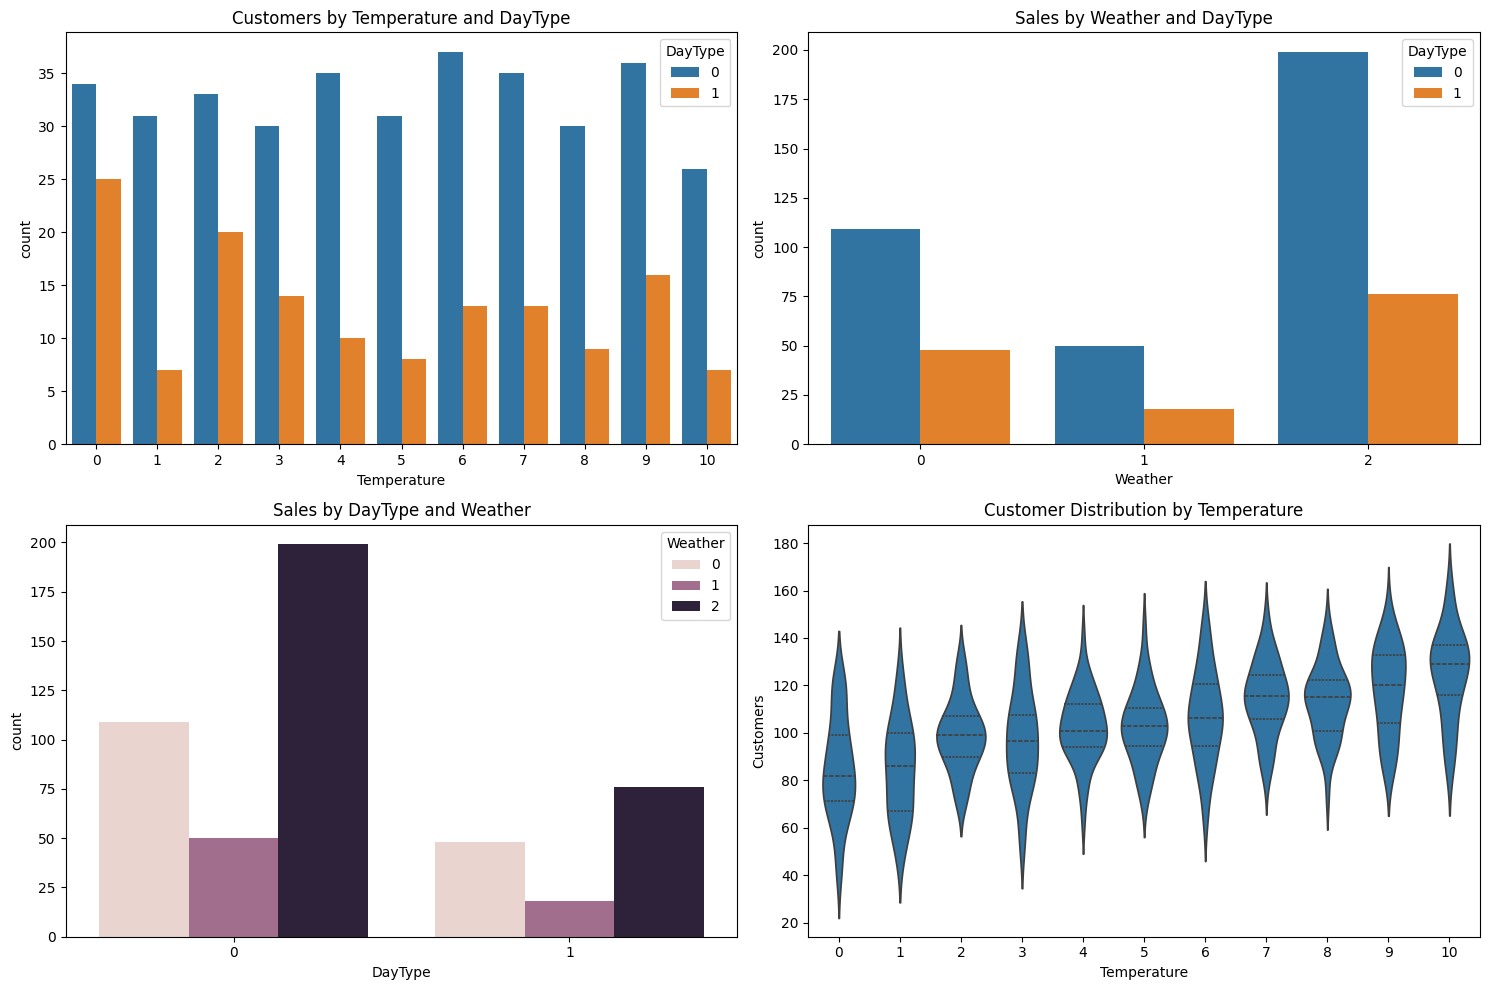

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(15, 10))


sns.countplot(x='Temperature', data=df, ax=ax[0,0], hue='DayType')
ax[0,0].set_title('Customers by Temperature and DayType')

sns.countplot(x='Weather', data=df, ax=ax[0,1], hue='DayType')
ax[0,1].set_title('Sales by Weather and DayType')

sns.countplot(x='DayType', data=df, ax=ax[1,0], hue='Weather')
ax[1,0].set_title('Sales by DayType and Weather')

sns.violinplot(x='Temperature', y='Customers', data=df, ax=ax[1,1], inner='quartile')
ax[1,1].set_title('Customer Distribution by Temperature')

plt.tight_layout()
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = ['Temperature', 'Weather', 'DayType']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(col, df[col].unique())

Temperature [ 6  3 10  7  4  9  2  5  1  0  8]
Weather [2 0 1]
DayType [0 1]


<Axes: >

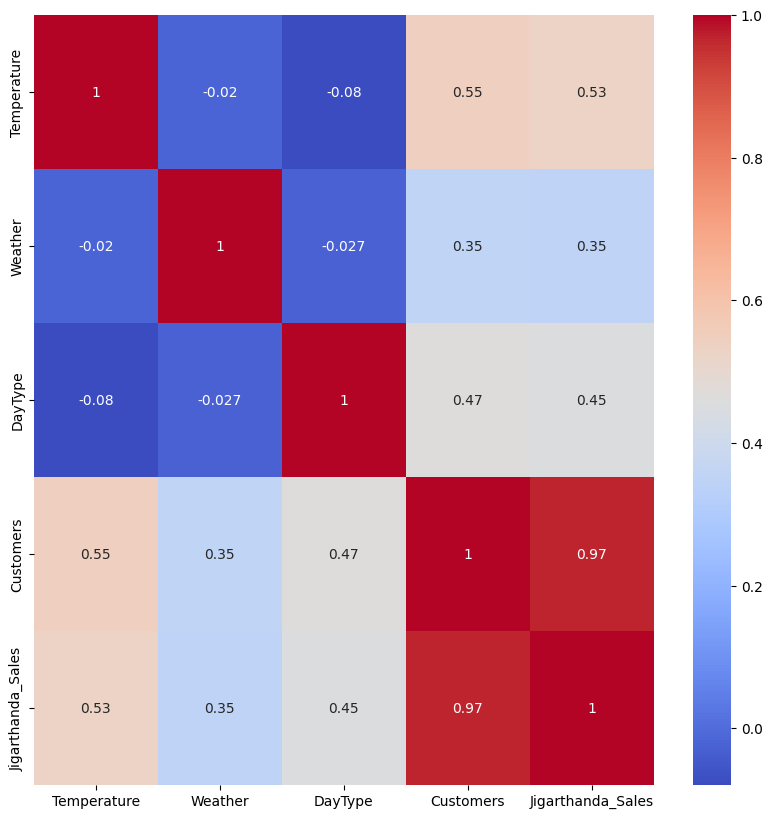

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Temperature', ylabel='Jigarthanda_Sales'>

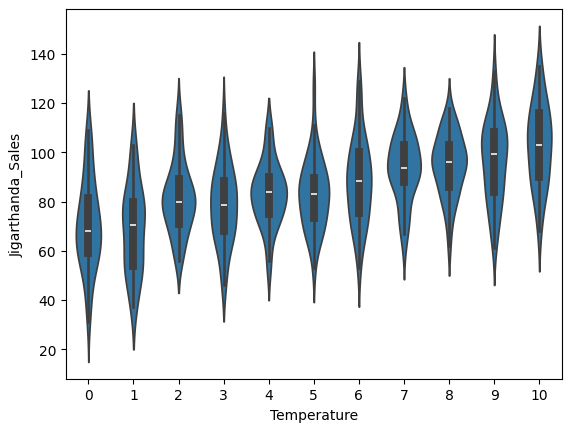

In [28]:
sns.violinplot(x='Temperature', y='Jigarthanda_Sales', data=df)

<Axes: xlabel='Customers', ylabel='Jigarthanda_Sales'>

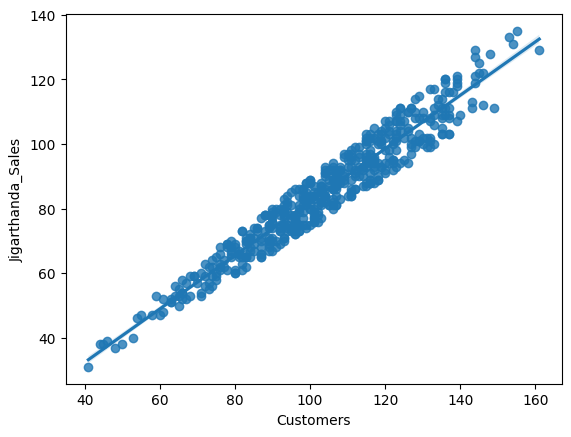

In [29]:
sns.regplot(x='Customers', y='Jigarthanda_Sales', data=df)

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Jigarthanda_Sales', axis=1)
y = df['Jigarthanda_Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [31]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfr = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Base model
rfr = RandomForestRegressor()

# Parameter grid for regression
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'absolute_error'],
    'random_state': [0]
}


grid = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rfr = RandomForestRegressor(
    criterion='squared_error',
    max_depth=8,
    min_samples_leaf=8,
    min_samples_split=2,
    random_state=42
)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)  # <- This defines rfr_pred

dtr = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=6,
    min_samples_leaf=6,
    min_samples_split=2,
    random_state=0
)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)  # <- This defines dtr_pred


In [34]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor(random_state=42)

# Train it
dtr.fit(X_train, y_train)

# Predict
dtr_pred = dtr.predict(X_test)


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Regression Parameter Grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'random_state': [0, 42]
}

grid = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

# Fit
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Best parameters: {'criterion': 'poisson', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [65]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=6,
    min_samples_leaf=6,
    min_samples_split=2,
    random_state=0
)

# Fit the model
dtr.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
print('Training accuracy: ', dtr.score(X_train, y_train))

Training accuracy:  0.9505333813838385


In [38]:
dtr_pred = dtr.predict(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [40]:
#fitting the model
lr.fit(X_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
#Training accuracy
lr.score(X_train, y_train)

0.0625

In [42]:
#predicting the test set results
lr_pred = lr.predict(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [64]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
#training accuracy
knn.score(X_train, y_train)

0.29

In [ ]:
knn_pred = knn.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Random Forest
print("Random Forest R2:", r2_score(y_test, rfr_pred))
print("Random Forest MAE:", mean_absolute_error(y_test, rfr_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rfr_pred)))

# Decision Tree
print("Decision Tree R2:", r2_score(y_test, dtr_pred))
print("Decision Tree MAE:", mean_absolute_error(y_test, dtr_pred))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dtr_pred)))

Random Forest R2: 0.9173629988719512
Random Forest MAE: 4.358646513624557
Random Forest RMSE: 5.110372167044106
Decision Tree R2: 0.9021360897168814
Decision Tree MAE: 4.6441429116268935
Decision Tree RMSE: 5.561302738480475


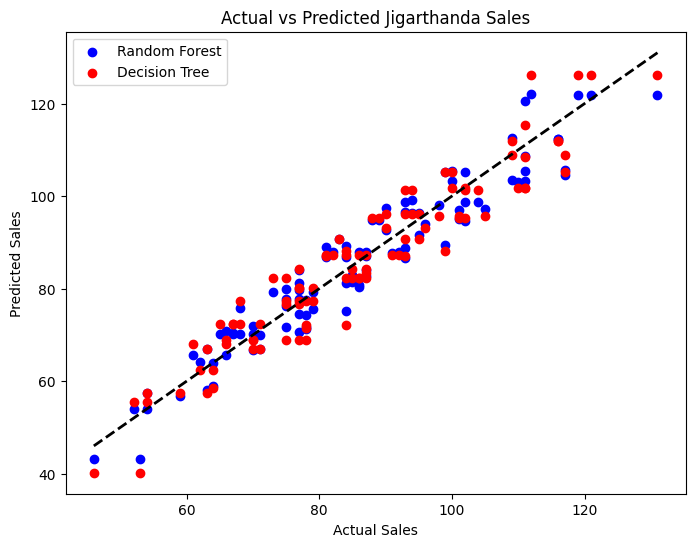

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, rfr_pred, color='blue', label='Random Forest')
plt.scatter(y_test, dtr_pred, color='red', label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Jigarthanda Sales')
plt.legend()
plt.show()

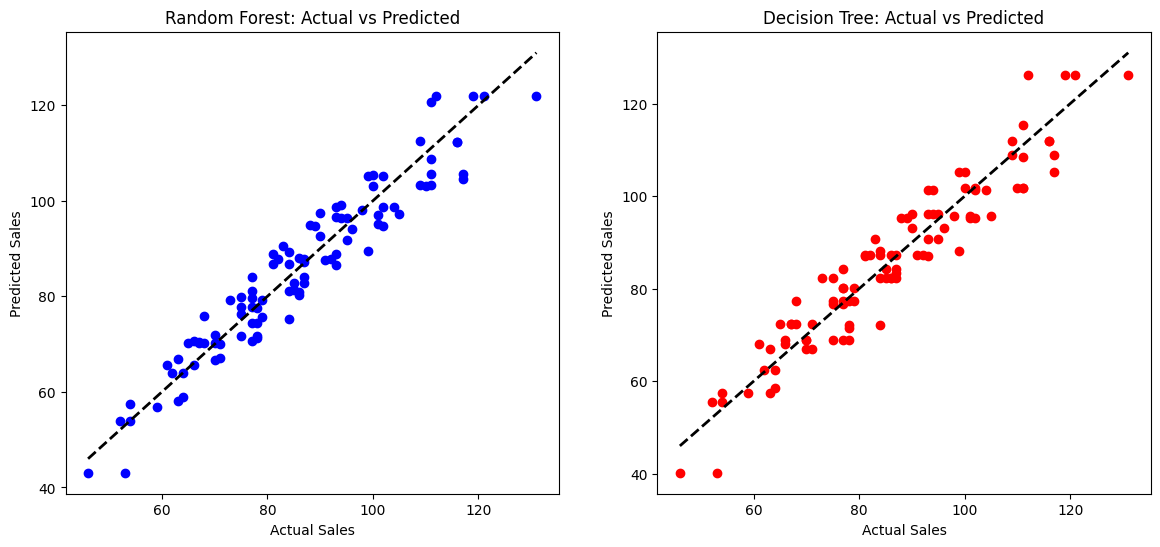

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Random Forest
ax[0].scatter(y_test, rfr_pred, color='blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0].set_title('Random Forest: Actual vs Predicted')
ax[0].set_xlabel('Actual Sales')
ax[0].set_ylabel('Predicted Sales')

# Decision Tree
ax[1].scatter(y_test, dtr_pred, color='red')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_title('Decision Tree: Actual vs Predicted')
ax[1].set_xlabel('Actual Sales')
ax[1].set_ylabel('Predicted Sales')

plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6724\4062379592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='magma')


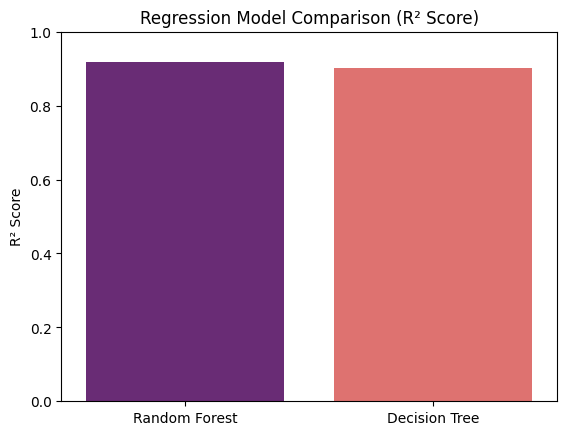

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = ['Random Forest', 'Decision Tree']
predictions = [rfr_pred, dtr_pred]

r2_scores = [r2_score(y_test, pred) for pred in predictions]

sns.barplot(x=models, y=r2_scores, palette='magma')
plt.title('Regression Model Comparison (R² Score)')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()



Random Forest Metrics:
R2 Score: 0.9173629988719512
MAE: 4.358646513624557
RMSE: 5.110372167044106

Decision Tree Metrics:
R2 Score: 0.9021360897168814
MAE: 4.6441429116268935
RMSE: 5.561302738480475


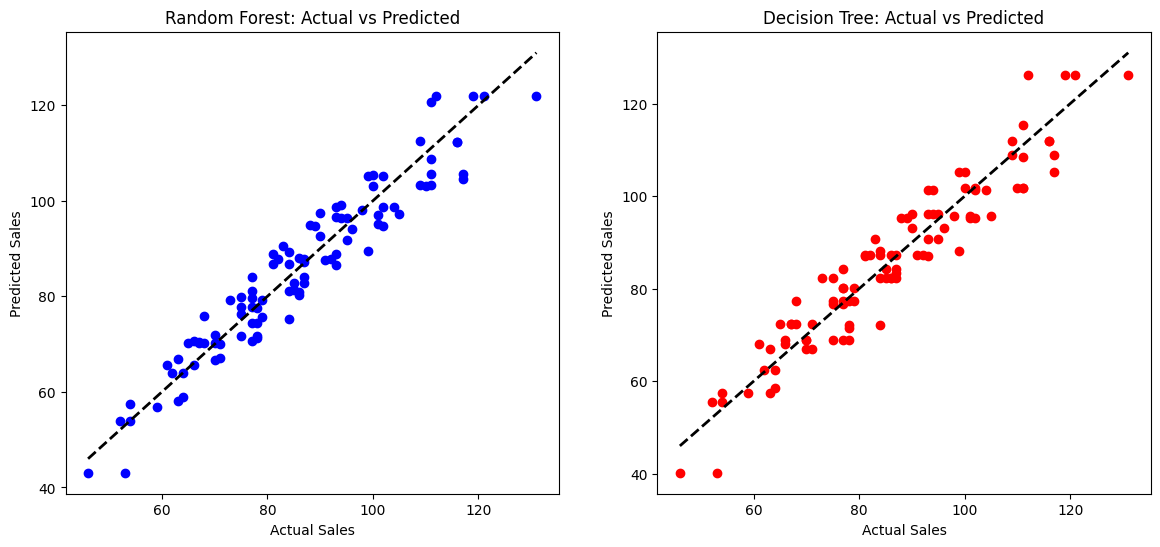

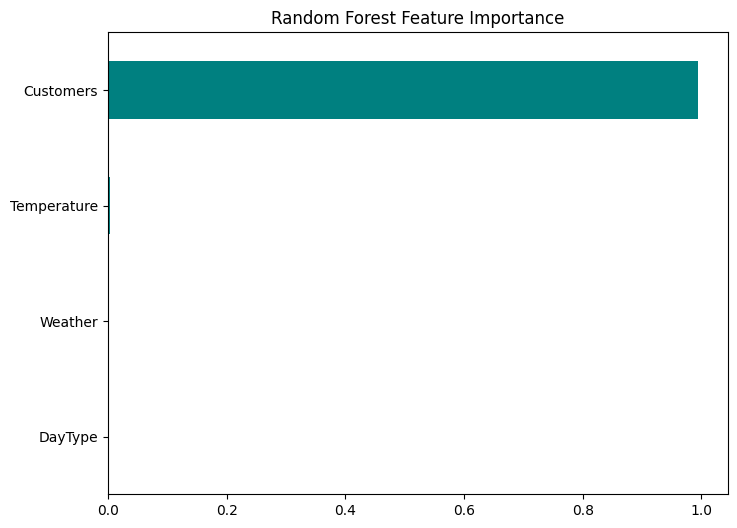

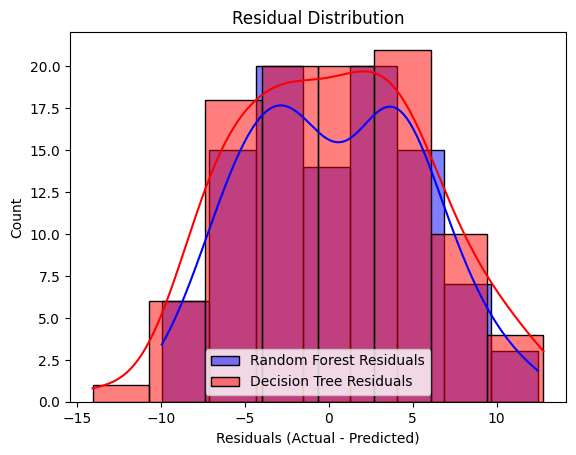

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


le = LabelEncoder()
for col in ['Temperature','Weather','DayType']:
    df[col] = le.fit_transform(df[col])

X = df.drop('Jigarthanda_Sales', axis=1)
y = df['Jigarthanda_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


rfr = RandomForestRegressor(
    criterion='squared_error',
    max_depth=8,
    min_samples_leaf=8,
    min_samples_split=2,
    random_state=42
)

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'absolute_error'],
    'random_state': [0]
}

grid_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rfr,
                        cv=5, n_jobs=-1, verbose=2, scoring='r2')

dtr = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=6,
    min_samples_leaf=6,
    min_samples_split=2,
    random_state=0
)

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

param_grid_dtr = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'random_state': [0, 42]
}

grid_dtr = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_dtr,
                        cv=5, n_jobs=-1, verbose=2, scoring='r2')



models = ['Random Forest', 'Decision Tree']
predictions = [rfr_pred, dtr_pred]

for name, pred in zip(models, predictions):
    print(f"\n{name} Metrics:")
    print("R2 Score:", r2_score(y_test, pred))
    print("MAE:", mean_absolute_error(y_test, pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))



fig, ax = plt.subplots(1, 2, figsize=(14,6))


ax[0].scatter(y_test, rfr_pred, color='blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0].set_title('Random Forest: Actual vs Predicted')
ax[0].set_xlabel('Actual Sales')
ax[0].set_ylabel('Predicted Sales')

ax[1].scatter(y_test, dtr_pred, color='red')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_title('Decision Tree: Actual vs Predicted')
ax[1].set_xlabel('Actual Sales')
ax[1].set_ylabel('Predicted Sales')

plt.show()

feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6), color='teal', title='Random Forest Feature Importance')
plt.show()

sns.histplot(y_test - rfr_pred, kde=True, color='blue', label='Random Forest Residuals')
sns.histplot(y_test - dtr_pred, kde=True, color='red', label='Decision Tree Residuals')
plt.title('Residual Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()


## Summary

#### Your sales mainly increase on hot and sunny days, especially during weekends. Higher temperature and more customer footfall directly boost Jigarthanda sales.Afternoon hours (1 PM–4 PM) generally show stronger demand. Our Random Forest model predicts your daily sales with 91.7% accuracy, helping you plan staffing and inventory. To maximize sales, increase stock on hot days, weekends, and peak hours while running offers during slower periods.